In [1]:
import datatree
import xradar as xd
import pyart 


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
## path to zarr
path_dtree = "/data/scratch/a/alfonso8/Guaviare.zarr"

In [3]:
# open radar datatre sotre in zarr
dtree = datatree.open_datatree(path_dtree, engine='zarr')

In [4]:
dtree

DataTree('None', parent=None)
│   Dimensions:              ()
│   Data variables:
│       altitude             float64 8B ...
│       instrument_type      <U5 20B ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       platform_type        <U5 20B ...
│       time_coverage_end    <U20 80B ...
│       time_coverage_start  <U20 80B ...
│       volume_number        int64 8B ...
│   Attributes:
│       Conventions:      None
│       comment:          im/exported using xradar
│       history:          None
│       institution:      None
│       instrument_name:  None
│       references:       None
│       source:           None
│       title:            None
│       version:          None
├── DataTree('sweep_0')
│       Dimensions:            (vcp_time: 12, azimuth: 720, range: 994)
│       Coordinates:
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float32 3kB 0.25 0.75 1.25 ... 359.2 359.8
│           crs_wkt            int64 8B ...
│           elevation          (azimuth) float32 3kB ...
│           latitude           float64 8B ...
│           longitude          float64 8B ...
│         * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
│           time               (azimuth) datetime64[ns] 6kB ...
│         * vcp_time           (vcp_time) datetime64[ns] 96B 2022-06-04T11:35:21.4990...
│           x                  (azimuth, range) float64 6MB ...
│           y                  (azimuth, range) float64 6MB ...
│           z                  (azimuth, range) float64 6MB ...
│       Data variables: (12/17)
│           DBTH               (vcp_time, azimuth, range) float32 34MB ...
│           DBZH               (vcp_time, azimuth, range) float32 34MB ...
│           DB_DBTE8           (vcp_time, azimuth, range) float32 34MB ...
│           DB_DBZE8           (vcp_time, azimuth, range) float32 34MB ...
│           DB_HCLASS          (vcp_time, azimuth, range) int16 17MB ...
│           KDP                (vcp_time, azimuth, range) float32 34MB ...
│           ...                 ...
│           ZDR                (vcp_time, azimuth, range) float32 34MB ...
│           follow_mode        (vcp_time) <U7 336B ...
│           prt_mode           (vcp_time) <U7 336B ...
│           sweep_fixed_angle  (vcp_time) float64 96B ...
│           sweep_mode         (vcp_time) <U20 960B ...
│           sweep_number       (vcp_time) int64 96B ...
├── DataTree('sweep_1')
│       Dimensions:            (vcp_time: 13, azimuth: 360, range: 747)
│       Coordinates:
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│           crs_wkt            int64 8B ...
│           elevation          (azimuth) float32 1kB ...
│           latitude           float64 8B ...
│           longitude          float64 8B ...
│         * range              (range) float32 3kB 1e+03 1.3e+03 ... 2.245e+05 2.248e+05
│           time               (azimuth) datetime64[ns] 3kB ...
│         * vcp_time           (vcp_time) datetime64[ns] 104B 2022-06-04T11:31:28.748...
│           x                  (azimuth, range) float64 2MB ...
│           y                  (azimuth, range) float64 2MB ...
│           z                  (azimuth, range) float64 2MB ...
│       Data variables: (12/17)
│           DBTH               (vcp_time, azimuth, range) float32 14MB ...
│           DBZH               (vcp_time, azimuth, range) float32 14MB ...
│           DB_DBTE8           (vcp_time, azimuth, range) float32 14MB ...
│           DB_DBZE8           (vcp_time, azimuth, range) float32 14MB ...
│           DB_HCLASS          (vcp_time, azimuth, range) int16 7MB ...
│           KDP                (vcp_time, azimuth, range) float32 14MB ...
│           ...                 ...
│           ZDR                (vcp_time, azimuth, range) float32 14MB ...
│           follow_mode        (vcp_time) <U7 364B 

In [5]:
def sel_dtime(ds, time):
    """ Function for selecting one date across all sweeps"""
    try:
        return ds.sel(vcp_time=time, method='nearest')
    except KeyError:
        return ds

In [6]:
dtree_filt = dtree.map_over_subtree(sel_dtime, time='2022-06-04 11:35')

In [7]:
# Create a pyart object
radar = pyart.xradar.Xradar(dtree_filt, default_sweep='sweep_0')

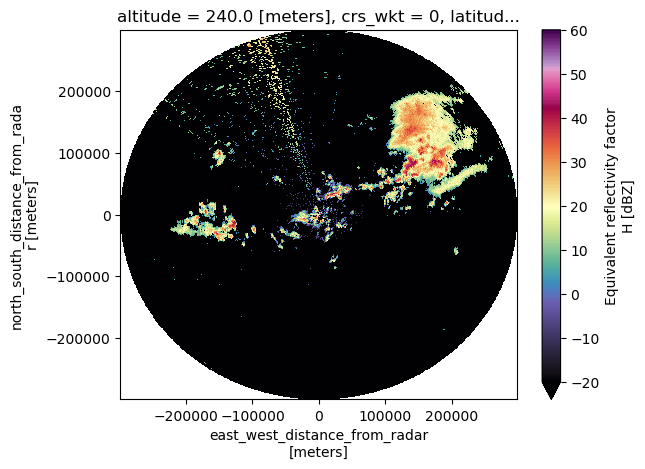

In [8]:
# Create a radial plot
radar['sweep_0'].DBZH.plot(x='x', y='y', vmin=-20, vmax=60, cmap="pyart_ChaseSpectral")

In [9]:
# gridding using PyArt
grid = pyart.map.grid_from_radars(
    (radar,),
    grid_shape=(1, 301, 301),
    grid_limits=(
        (0, 10_000),
        (-300_000.0, 300_000.0),
        (-300_000.0, 300_000.0),
    ),
)

/data/keeling/a/alfonso8/miniconda3/envs/radar_grid/lib/python3.12/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


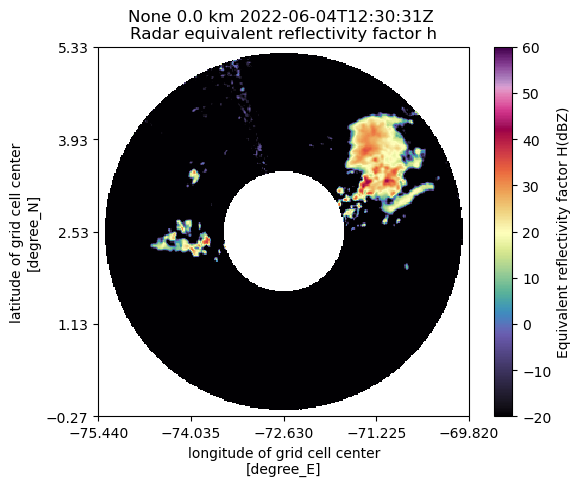

In [10]:
# diplaying gridded data 
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid(
    "DBZH", level=0, vmin=-20, vmax=60, cmap="pyart_ChaseSpectral"
)

In [11]:
pyart.__version__

'1.18.1'